In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from time import time
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics,preprocessing
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [62]:
directory = os.fsencode('../data/')

location = False  #range location
mean_dopp = False  #mean of doppler spectrum
var_dopp = False  #variance of doppler spectrum, normalized by total power and square of number of bins
SPC_Hi = True  #scattering point cloud, high threshold
SPD = True #scattering point difference, high threshold
MDR = True #magnitude difference rate
strength = False #sum of doppler spectrum
max_dev = False #deviation from maximum in doppler spectrum (maybe same as var_dopp)
SPC_Lo = False #scattering point cloud, low threshold
peak_count = False #peak count
std_deviation = False #var_dopp difference rate
harmonic_power_content = False #power content of minor peaks in doppler spectrum
frame_counter = False #frame reference of each sample, just for visualization, not a feature
correlation = False
max_to_mean_distance = False
peak_strength_std = False
Lo_peak_count = False
Lo_harmonic_power_content = False
SPC_Mi = False
Lo_skewness = False
Lo_skewness_variation = False
Hi_deviation = False
Hi_deviation_difference = False
Mi_peak_count = False
Mi_harmonic_power_content = False
Mi_skewness = False
Mi_skewness_difference = False
Hi_skewness = False
Hi_skewness_difference = False
Lo_skewness_mean = False
Side_lobe_strength = False
Side_lobe_max_strength = False
SPC_Lo_skewness = False
SPC_Mi_Hi_skewness = False
SPC_Mi_variance = False



feature_list = {'location':location,'mean_dopp':mean_dopp,'var_dopp':var_dopp,'SPC_Hi':SPC_Hi,'SPD':SPD,\
                'MDR':MDR,'strength':strength,'max_dev':max_dev,'SPC_Lo':SPC_Lo,'peak_count':peak_count,\
               'std_deviation':std_deviation,'harmonic_power_content':harmonic_power_content,'frame_counter':frame_counter,\
                'correlation':correlation,'max_to_mean_distance':max_to_mean_distance,'peak_strength_std':peak_strength_std,\
                'Lo_peak_count':Lo_peak_count,'Lo_harmonic_power_content':Lo_harmonic_power_content,"SPC_Mi":SPC_Mi,"Lo_skewness":Lo_skewness,\
                "Lo_skewness_variation":Lo_skewness_variation,"Hi_deviation":Hi_deviation,"Hi_deviation_difference":Hi_deviation_difference,\
               'Mi_peak_count':Mi_peak_count,'Mi_harmonic_power_content':Mi_harmonic_power_content,'Mi_skewness':Mi_skewness,\
                'Mi_skewness_difference':Mi_skewness_difference,'Hi_skewness':Hi_skewness,'Hi_skewness_difference':Hi_skewness_difference,\
               'Lo_skewness_mean':Lo_skewness_mean,'Side_lobe_strength': Side_lobe_strength,'Side_lobe_max_strength':Side_lobe_max_strength,\
               'SPC_Lo_skewness':SPC_Lo_skewness, 'SPC_Mi_Hi_skewness':SPC_Mi_Hi_skewness,'SPC_Mi_variance':SPC_Mi_variance}

class_number = 3
X = []
y = []
files = []
y = np.empty(1)
features = np.array([location, mean_dopp, var_dopp, SPC_Hi, SPD, MDR, strength, max_dev, SPC_Lo, peak_count, std_deviation, harmonic_power_content,\
                     frame_counter, correlation, max_to_mean_distance, peak_strength_std, Lo_peak_count, Lo_harmonic_power_content,SPC_Mi,Lo_skewness,\
                     Lo_skewness_variation,Hi_deviation,Hi_deviation_difference,Mi_peak_count,Mi_harmonic_power_content,Mi_skewness,Mi_skewness_difference,\
                    Hi_skewness,Hi_skewness_difference,Lo_skewness_mean,Side_lobe_strength,Side_lobe_max_strength,SPC_Lo_skewness,\
                    SPC_Mi_Hi_skewness,SPC_Mi_variance])
file_number = 0
X = np.zeros((1,sum(features)))
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.find('walking_diagonal_1_Dataset_1') == -1 and (filename.find('boresight_1') != -1 or filename.find('boresight_2') != -1\
                                                               or filename.find('diagonal_1') != -1 or filename.find('diagonal_2') != -1\
                                                               or filename.find('azimuth') != -1) and filename.find('azimuth_2_Dataset_2') == -1:
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        
        file_number += 1
X = X[1:,:]
y = y[1:]
y = y - min(y) #reposition y from 0 to ....
print(X.shape)
print(y.shape)
feature_names = []
for feature in feature_list:
    if feature_list[feature] == True:
        feature_names.append(feature)
feature_names = np.array(feature_names)
print(f"Used : {file_number} files")
#for col in range(X.shape[1]):
#    X[:,col] /= max(X[:,col])

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=100)
#print(X_train.shape)
X_train = X
y_train = y

../data/biking_boresight_1_Dataset_1_statistics.txt
(104, 35)
../data/biking_boresight_1_Dataset_2_statistics.txt
(40, 35)
../data/biking_boresight_2_Dataset_1_statistics.txt
(101, 35)
../data/biking_boresight_2_Dataset_2_statistics.txt
(38, 35)
../data/driving_boresight_1_Dataset_1_statistics.txt
(58, 35)
../data/driving_boresight_1_Dataset_2_statistics.txt
(51, 35)
../data/driving_boresight_2_Dataset_1_statistics.txt
(59, 35)
../data/driving_boresight_2_Dataset_2_statistics.txt
(39, 35)
../data/walking_boresight_1_Dataset_1_statistics.txt
(109, 35)
../data/walking_boresight_1_Dataset_2_statistics.txt
(134, 35)
../data/walking_boresight_2_Dataset_1_statistics.txt
(110, 35)
../data/walking_boresight_2_Dataset_2_statistics.txt
(95, 35)
(938, 3)
(938,)
Used : 12 files


In [64]:
X = []
y = []
i = 0
files = []
y = np.empty(1)
X = np.zeros((1,sum(features)))
file_number = 0
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and (filename.find('boresight_3') != -1 or filename.find('diagonal_3') != -1 or filename.find('azimuth_2_Dataset_2') != -1):
        file_number += 1
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]
y = y - min(y)
print(X.shape)
print(y.shape)
X_test = X
y_test = y
print(f"Used : {file_number} files")

../data/biking_boresight_3_Dataset_1_statistics.txt
(78, 35)
../data/biking_boresight_3_Dataset_2_statistics.txt
(35, 35)
../data/driving_boresight_3_Dataset_1_statistics.txt
(57, 35)
../data/driving_boresight_3_Dataset_2_statistics.txt
(46, 35)
../data/walking_boresight_3_Dataset_1_statistics.txt
(136, 35)
../data/walking_boresight_3_Dataset_2_statistics.txt
(85, 35)
(437, 3)
(437,)
Used : 6 files


In [54]:
print(y_test == 0)

[False False False ... False False False]


In [65]:
### Normalize dataset
X_dataset = np.append(X_train,X_test,axis=0)
scaler = preprocessing.StandardScaler().fit(X_dataset)
mean = scaler.mean_
scale = scaler.scale_
X_scaled = scaler.transform(X_dataset)
X_train = X_scaled[:len(y_train),:]
X_test = X_scaled[len(y_train):,:]
filename = 'boresight_diagonal_azimuth_norm_factors.csv'

data_to_file = pd.DataFrame([mean,scale])
print(data_to_file)
#data_to_file.to_csv(filename, sep='\t',index=False, header=True)
### Make cross validation set
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, train_size=0.80, test_size=0.20, random_state=100)
print(X_train.shape)
print(X_dataset.shape)

          0         1         2
0  0.063429  0.033693  0.543126
1  0.045296  0.038714  0.619770
(938, 3)
(1375, 3)


In [47]:
etas = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
max_depths = [6]
gammas = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
 

kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)

total_iterations = len(etas)*len(max_depths)*len(gammas)

max_features = 3
scoring_by_n_features_xgb = np.zeros(max_features)
total_time_tic = time()

time_per_feature_tic = time()
best_params_xgb = [{} for _ in range(max_features)]

iteration = 0
start_algo_tic_fwd = time()
for gamma in gammas:
    for max_depth in max_depths:
        for eta in etas:
            tic_fwd = time()
            model = xgb.XGBClassifier(objective='multi:softmax',eval_metric='mlogloss',eta=eta,gamma=gamma,max_depth=max_depth,use_label_encoder=False)
            model.fit(X_train, y_train)
            # Fit model using each importance as a threshold
            thresholds = np.flip(sort(model.feature_importances_))
            n = 0 #feature number
            for thresh in thresholds[:max_features]:
                # select features using threshold
                selection = SelectFromModel(model, threshold=thresh, prefit=True)
                select_X_train = selection.transform(X_train)
                # train model
                selection_model = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=eta,gamma=gamma,max_depth=max_depth,use_label_encoder=False)
                results = cross_val_score(selection_model, select_X_train, y_train, cv=kfold)
                score = results.mean()
                standard_deviation = results.std()
                if score > scoring_by_n_features_xgb[n]:
                    best_params_xgb[n]["gamma"] = gamma
                    best_params_xgb[n]["max_depth"] = max_depth
                    best_params_xgb[n]["eta"] = eta
                    best_params_xgb[n]["features"] = feature_names[selection.get_support()]
                    best_params_xgb[n]["support"] = selection.get_support()
                    best_params_xgb[n]["standard_deviation"] = standard_deviation
                    best_params_xgb[n]["score"] = score
                    best_params_xgb[n]["num_features"] = n
                    scoring_by_n_features_xgb[n] = score
                n += 1
            iteration += 1
            toc_fwd = time()
            print(f"Iteration: {iteration}/{total_iterations}")
            print(f"Done in {toc_fwd - tic_fwd:.3f}s")
            
end_algo_toc_fwd = time()
print(f"Learning done in {(end_algo_toc_fwd - start_algo_tic_fwd)/60:.3f}m")

Iteration: 1/30
Done in 10.615s
Iteration: 2/30
Done in 6.814s
Iteration: 3/30
Done in 6.846s
Iteration: 4/30
Done in 6.898s
Iteration: 5/30
Done in 7.798s
Iteration: 6/30
Done in 7.096s
Iteration: 7/30
Done in 8.547s
Iteration: 8/30
Done in 7.361s
Iteration: 9/30
Done in 7.518s
Iteration: 10/30
Done in 6.112s
Iteration: 11/30
Done in 5.836s
Iteration: 12/30
Done in 5.327s
Iteration: 13/30
Done in 7.310s
Iteration: 14/30
Done in 6.500s
Iteration: 15/30
Done in 6.021s
Iteration: 16/30
Done in 6.104s
Iteration: 17/30
Done in 6.249s
Iteration: 18/30
Done in 6.549s
Iteration: 19/30
Done in 7.072s
Iteration: 20/30
Done in 5.931s
Iteration: 21/30
Done in 5.467s
Iteration: 22/30
Done in 8.776s
Iteration: 23/30
Done in 7.311s
Iteration: 24/30
Done in 6.828s
Iteration: 25/30
Done in 7.625s
Iteration: 26/30
Done in 5.871s
Iteration: 27/30
Done in 5.236s
Iteration: 28/30
Done in 5.252s
Iteration: 29/30
Done in 5.397s
Iteration: 30/30
Done in 5.238s
Learning done in 3.359m


In [66]:
overall_best_params_xgb = {'score':0}
standard_deviation = []
test_scores = []
cv_scores = []
u = 0
for elem in best_params_xgb:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(f"Cross-validation set score: {elem['score']}")
    print(elem["support"].shape)
    if elem["score"] > overall_best_params_xgb["score"]:
        overall_best_params_xgb["score"] = elem["score"]
        overall_best_params_xgb["features"] = elem["features"]
        overall_best_params_xgb["max_depth"] = elem["max_depth"]
        overall_best_params_xgb["gamma"] = elem["gamma"]
        overall_best_params_xgb["eta"] = elem["eta"]
        overall_best_params_xgb["support"] = elem["support"]
    clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=elem['eta'],gamma=elem['gamma'],max_depth=elem['max_depth'],use_label_encoder=False)
    clf.fit(X_train[:,elem["support"]],y_train)
    y_pred = clf.predict(X_test[:,elem["support"]])
    score = metrics.accuracy_score(y_test, y_pred)
    standard_deviation.append(elem['standard_deviation'])
    test_scores.append(score)
    cv_scores.append(elem["score"])

Number of features: 1
['SPD']
Cross-validation set score: 0.6855181880576529
(3,)
Number of features: 2
['SPC_Hi' 'SPD']
Cross-validation set score: 0.785746968657058
(3,)
Number of features: 3
['SPC_Hi' 'SPD' 'MDR']
Cross-validation set score: 0.7942347288949898
(3,)


<ipython-input-70-dd097e544dc3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(ax.get_yticks(),2),fontsize=20)



Best score over all: 0.7942347288949898
Features: ['SPC_Hi' 'SPD' 'MDR']
Final score: 0.7803203661327232


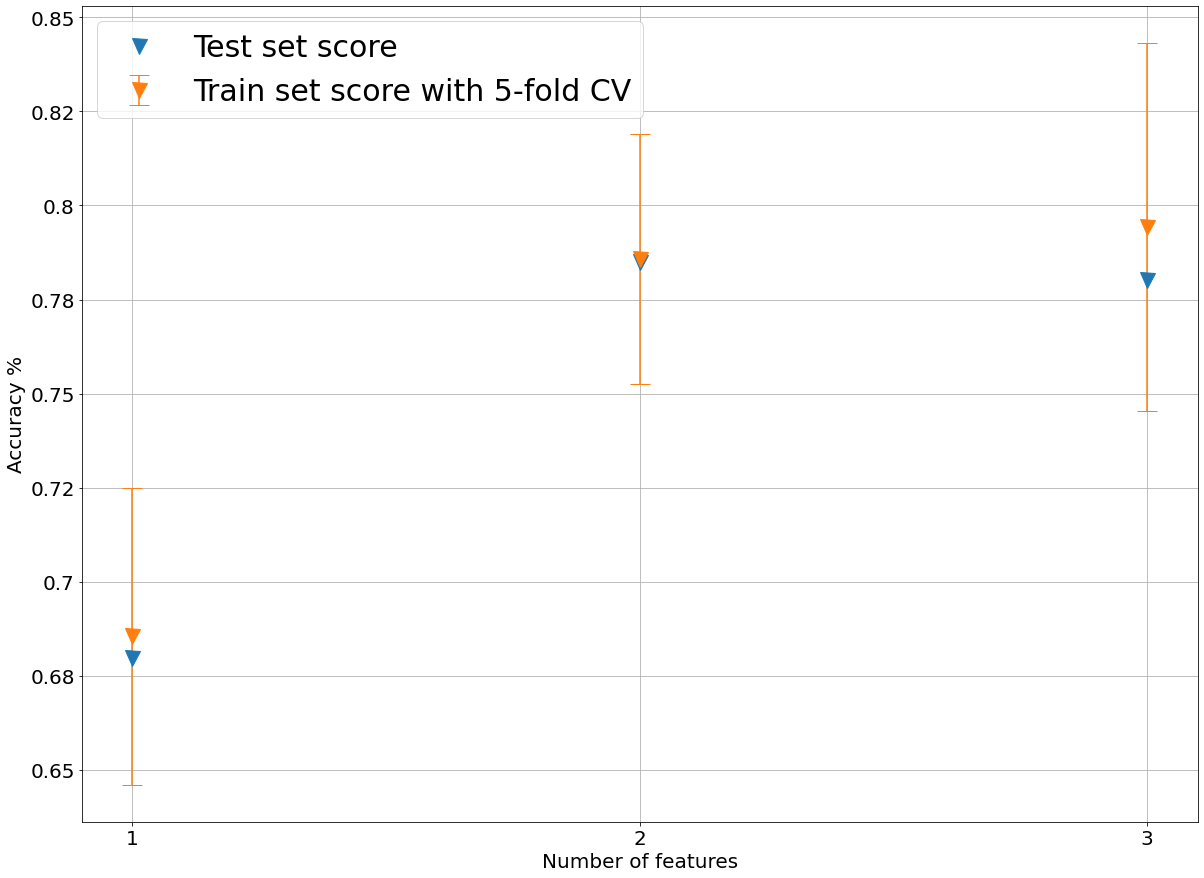

In [70]:
max_features = u
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax.set_xlabel("Number of features",fontsize=20)
ax.set_ylabel("Accuracy %",fontsize=20)
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=15,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='Train set score with 5-fold CV',marker='v',markersize=15,linestyle='none',capsize=10)
ax.legend(fontsize=30)
ax.set_xticks(features_number)
ax.set_xticklabels(ax.get_xticks(),fontsize=20)
ax.set_yticklabels(np.round(ax.get_yticks(),2),fontsize=20)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")
#plt.rcParams.update({'font.size': 25})

plt.savefig('Thesis_figures/Feature_VS_Accuracy_proposed_approach.png',format='png')

In [35]:
X = []
y = []
i = 0
files = []
y = np.empty(1)
X = np.zeros((1,sum(features)))
file_number = 0
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and (filename.find('azimuth_2_Dataset_2') != -1):
        file_number += 1
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 0
        elif filename.startswith('biking_diagonal'):
            i = 1
        elif filename.startswith('driving_diagonal'):
            i = 2
        elif filename.startswith('walking_azimuth'):
            i = 0
        elif filename.startswith('biking_azimuth'):
            i = 1
        elif filename.startswith('driving_azimuth'):
            i = 2
        y = np.append(y,i + np.zeros((data.shape[0],1)))
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]
y = y - min(y)
print(X.shape)
print(y.shape)
X_test = X
y_test = y
print(f"Used : {file_number} files")
X_test = scaler.transform(X_test)

../data/biking_azimuth_2_Dataset_2_statistics.txt
(98, 35)
../data/driving_azimuth_2_Dataset_2_statistics.txt
(81, 35)
../data/walking_azimuth_2_Dataset_2_statistics.txt
(75, 35)
(254, 32)
(254,)
Used : 3 files


<ipython-input-74-155b672cc9e8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
<ipython-input-74-155b672cc9e8>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)


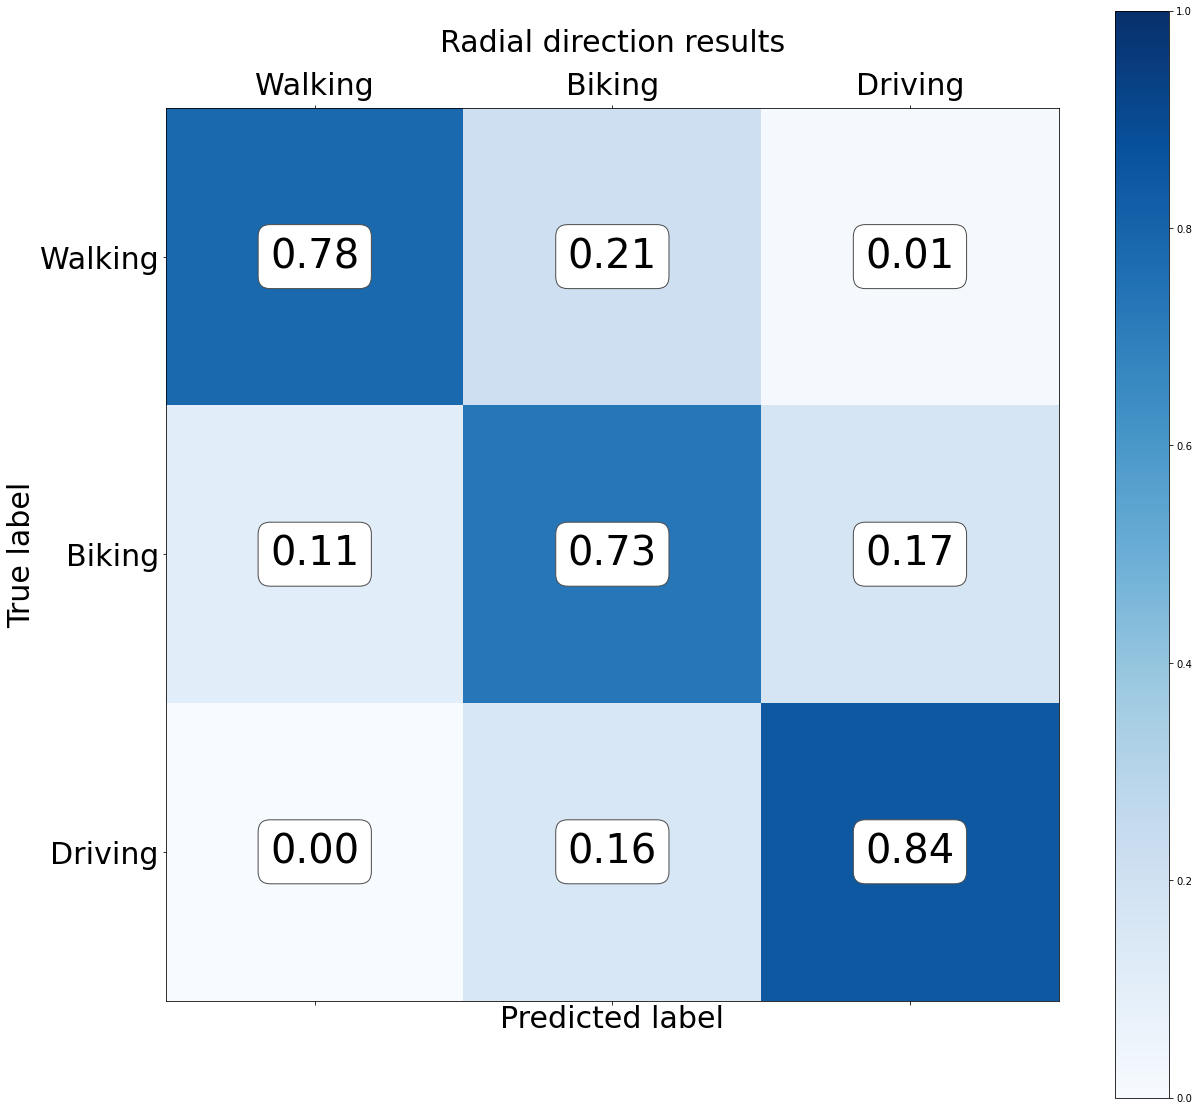

In [74]:
import matplotlib as mpl
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],0)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][column%3] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(20,20))
radial_results = confusion_results[0:3]
cax = ax.matshow(radial_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_ylabel('True label',fontsize=30)
_=ax.set_xlabel('Predicted label',fontsize=30)
_=ax.set_title('Radial direction results', fontsize=30, pad=20)
_=ax.set_xticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
_=ax.set_yticklabels(['']+['Walking','Biking','Driving'],fontsize=30)
for (i, j), z in np.ndenumerate(radial_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=40,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.savefig('Thesis_figures/Radial_Performance_Matrix_proposed_approach',format='png')

<ipython-input-26-dce64cd0750e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-26-dce64cd0750e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


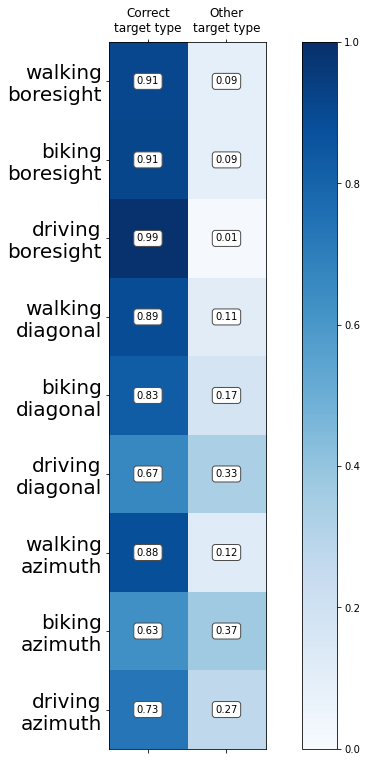

In [26]:
import matplotlib as mpl
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


<class 'xgboost.sklearn.XGBClassifier'>


XGBoostError: [09:41:34] /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1183: Check failed: learner_model_param_.num_feature >= p_fmat->Info().num_col_ (19 vs. 20) : Number of columns does not match number of features in booster.
Stack trace:
  [bt] (0) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x9f738) [0x14aacbb6f738]
  [bt] (1) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x1c7711) [0x14aacbc97711]
  [bt] (2) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x1d1fa4) [0x14aacbca1fa4]
  [bt] (3) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(XGBoosterPredict+0xe7) [0x14aacbb75457]
  [bt] (4) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x14ab04bf49dd]
  [bt] (5) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x14ab04bf4067]
  [bt] (6) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x10da8) [0x14ab04c0ada8]
  [bt] (7) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1108c) [0x14ab04c0b08c]
  [bt] (8) /home/coppolr/Desktop/Classification-Radar/env/bin/python(_PyObject_MakeTpCall+0x22f) [0x562991b6285f]



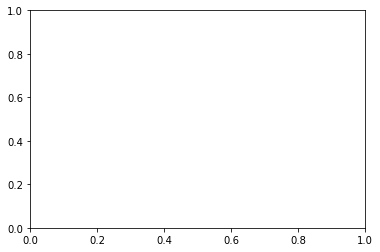

In [13]:
fig,ax = plt.subplots(1,1)
bst = xgb.XGBClassifier()  # init model
bst.load_model('Trained_stuff/'+filename)  # load data
print(type(bst))
y_pred = bst.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
disp = plot_confusion_matrix(bst,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)

<ipython-input-25-f082db3982ab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-25-f082db3982ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


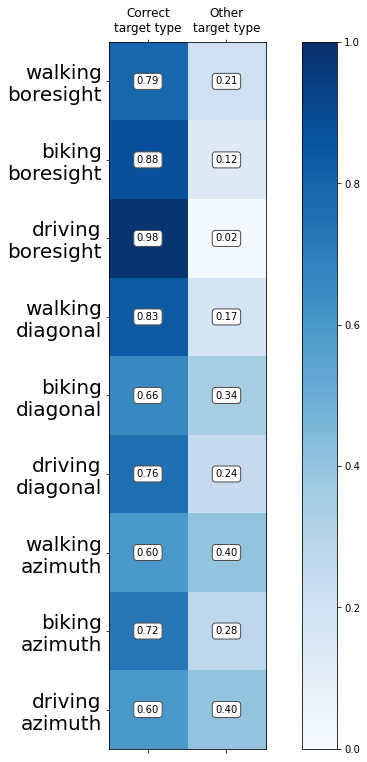

In [25]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


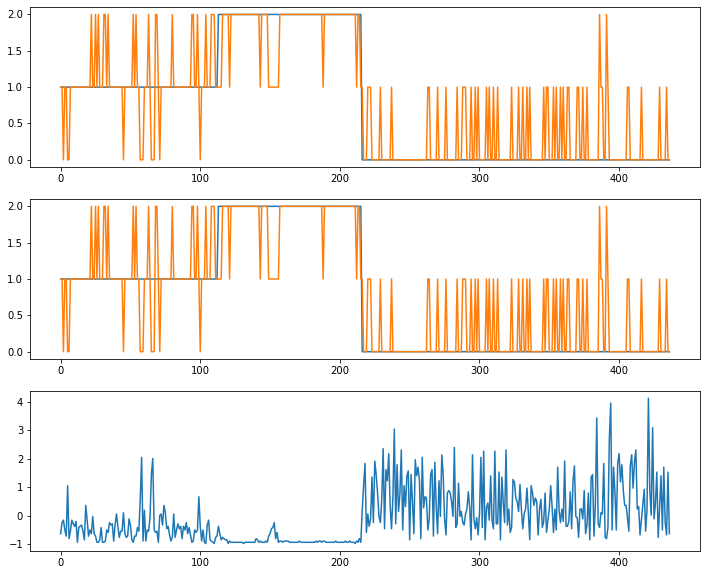

In [51]:
fig,ax = plt.subplots(3,1,figsize=[12,10])
ax[0].plot(y_test)
predictions = clf.predict(X_test[:,overall_best_params_xgb["support"]])
ax[0].plot(predictions)
y_test_converted = []
for y in y_test:
    if y == 0 or y == 3 or y == 6:
        y_test_converted.append(0)
    elif y == 1 or y == 4 or y == 7:
        y_test_converted.append(1)
    elif y == 2 or y == 5 or y == 8:
        y_test_converted.append(2)
        
predictions_converted = []
for pred in predictions:
    if pred == 0 or pred == 3 or pred == 6:
        predictions_converted.append(0)
    elif pred == 1 or pred == 4 or pred == 7:
        predictions_converted.append(1)
    elif pred == 2 or pred == 5 or pred == 8:
        predictions_converted.append(2)
    else:
        (print(pred))

ax[1].plot(y_test_converted)
ax[1].plot(predictions_converted)
ax[2].plot(X_test[:,0])

In [15]:
print(len(predictions_converted))

1245


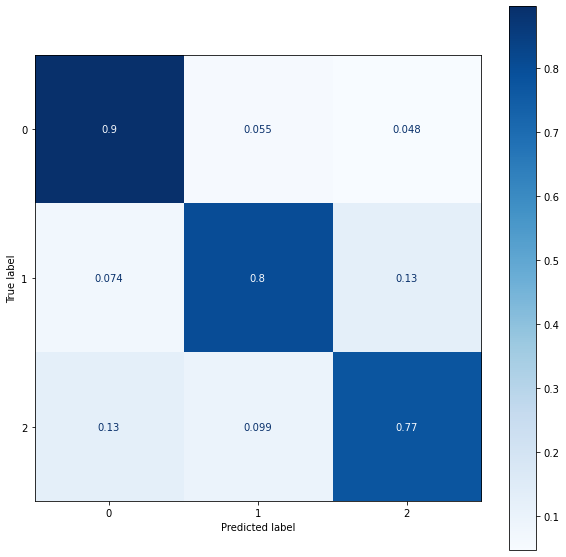

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
class_names = ['walkig\nboresight','biking\nboresight','driving\nboresight','walking\ndiagonal','biking\ndiagonal','driving\ndiagonal']
cm = metrics.confusion_matrix(y_test_converted,predictions_converted,normalize='true')
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues,ax=ax)

   Feature  Importance                    Name
0       f0        2140                location
1       f3        1841                strength
2       f8        1386             correlation
3       f9        1320    max_to_mean_distance
4       f7        1272           std_deviation
5      f13        1262  Mi_skewness_difference
6      f15        1229      Side_lobe_strength
7       f1        1194                var_dopp
8      f14        1174  Hi_skewness_difference
9       f5        1086                  SPC_Lo
10     f17        1028         SPC_Mi_variance
11     f11        1020                  SPC_Mi
12      f4         992                 max_dev
13     f16         913  Side_lobe_max_strength
14      f2         743                  SPC_Hi
15     f10         670           Lo_peak_count
16     f12         470           Mi_peak_count
17      f6         223              peak_count


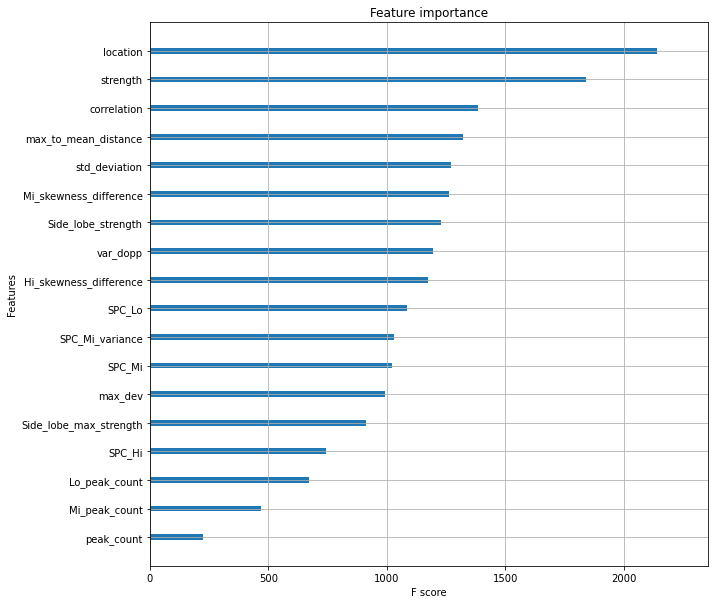

In [31]:
importance_type='weight'
fscores = clf.get_booster().get_score(importance_type=importance_type)
feat_importances = []

for ft, score in fscores.items():
    feat_importances.append({'Feature': ft, 'Importance': score, 'Name': overall_best_params_xgb["features"][int(ft[1:])]})
feat_importances = pd.DataFrame(feat_importances)
feat_importances = feat_importances.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)
print(feat_importances)
feat_labels = []
for elem in feat_importances.values:
    feat_labels.append(elem[2])
feat_labels = np.flip(feat_labels)
fig,ax = plt.subplots(1,1,figsize=(10,10))
_=plot_importance(clf,ax=ax,importance_type=importance_type,show_values=False).set_yticklabels(feat_labels)

In [50]:
import pandas as pd
df = pd.DataFrame.from_dict(best_params_xgb)
df.to_csv('Proposed_algo/'+'Boresight.csv', sep='\t',index=False, header=True)

# Load model

In [37]:
asd = pd.read_csv("Trained_stuff/Boresight_Diagonal_azimuth.csv",delimiter='\t')
d = asd.to_dict("split")

my_dictionary_list = []
for row_idx in range(len(d['data'])):
    for col_idx in range(len(d['columns'])):
        if d['columns'][col_idx] == 'support':
            split_bools = d['data'][row_idx][col_idx] = d['data'][row_idx][col_idx].replace("\n", "").replace("  "," ").replace("[","").replace("]","").split(" ")
            d['data'][row_idx][col_idx] = []
            for elem in split_bools:
                if elem == 'True':
                    d['data'][row_idx][col_idx].append(True)
                elif elem == 'False':
                    d['data'][row_idx][col_idx].append(False)
    best_params= dict(zip(d["columns"],d["data"][row_idx]))
    best_params[d['columns'][col_idx]] = d['data']
    my_dictionary_list.append(best_params)

In [38]:
overall_best_params_xgb = {'score':0}
standard_deviation = []
test_scores = []
cv_scores = []
u = 0
for elem in my_dictionary_list:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(f"Cross-validation set score: {elem['score']}")
    if elem["score"] > overall_best_params_xgb["score"]:
        overall_best_params_xgb["score"] = elem["score"]
        overall_best_params_xgb["features"] = elem["features"]
        overall_best_params_xgb["max_depth"] = elem["max_depth"]
        overall_best_params_xgb["gamma"] = elem["gamma"]
        overall_best_params_xgb["eta"] = elem["eta"]
        overall_best_params_xgb["support"] = elem["support"]
    clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=elem['eta'],gamma=elem['gamma'],max_depth=elem['max_depth'],use_label_encoder=False)
    clf.fit(X_train[:,elem["support"]],y_train)
    y_pred = clf.predict(X_test[:,elem["support"]])
    score = metrics.accuracy_score(y_test, y_pred)
    standard_deviation.append(elem['standard_deviation'])
    test_scores.append(score)
    cv_scores.append(elem["score"])
 

Number of features: 1
['Mi_skewness_difference']
Cross-validation set score: 0.3267159960093116
Number of features: 2
['Mi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.392991020951114
Number of features: 3
['Mi_skewness_difference' 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.4365626870635184
Number of features: 4
['SPC_Mi' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.491488526770868
Number of features: 5
['location' 'SPC_Mi' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.5827712005320917
Number of features: 6
['location' 'strength' 'SPC_Mi' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.641315264383106
Number of features: 7
['location' 'var_dopp' 'strength' 'SPC_Mi' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set 


Best score over all: 0.7264023944130362
Features: ['location' 'var_dopp' 'SPC_Hi' 'strength' 'max_dev' 'SPC_Lo'
 'std_deviation' 'harmonic_power_content' 'correlation'
 'max_to_mean_distance' 'Lo_peak_count' 'SPC_Mi' 'Hi_deviation'
 'Mi_peak_count' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength' 'Side_lobe_max_strength' 'SPC_Mi_variance']
Final score: 0.6305220883534136


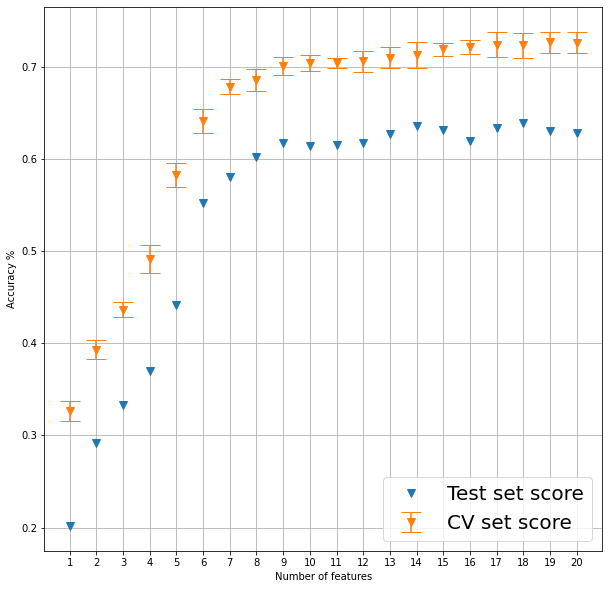

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel("Number of features")
ax.set_ylabel("Accuracy %")
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=8,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='CV set score',marker='v',markersize=8,linestyle='none',capsize=10)
ax.legend(fontsize=20)
ax.set_xticks(features_number)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")

0.6305220883534136


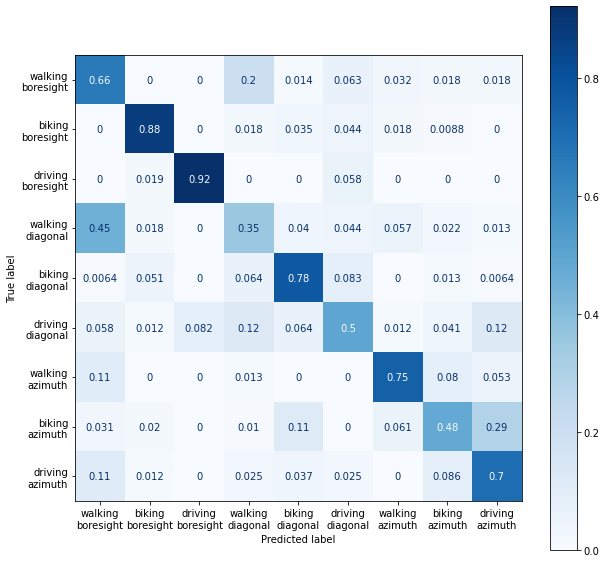

In [40]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
disp = plot_confusion_matrix(clf,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)

<ipython-input-36-f082db3982ab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-36-f082db3982ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


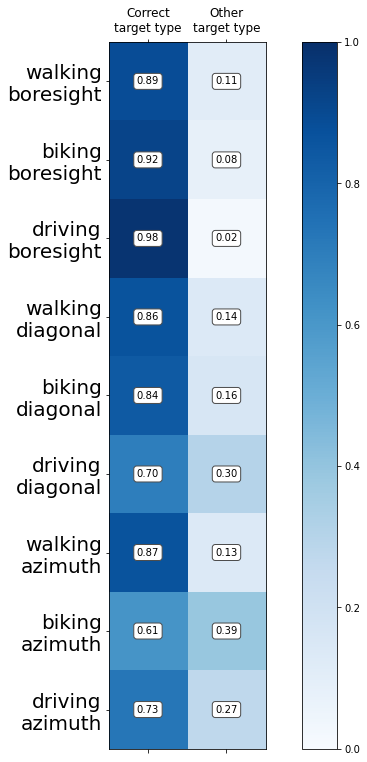

In [36]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
